In [133]:
import pandas as pd
import os
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline

In [7]:
# Define the path where the CSV files are located
csv_folder_path = ""  # Leave as an empty string to indicate the same folder as the notebook

# Get a list of specific CSV files by their exact names
csv_files = [
    "youtube_videos_2020-01-01_to_2020-03-31.csv",
    "youtube_videos_2020-04-01_to_2020-06-30.csv",
    "youtube_videos_2020-07-01_to_2020-09-30.csv",
    "youtube_videos_2020-10-01_to_2020-12-31.csv",
    "youtube_videos_2021-01-01_to_2021-03-31.csv",
    "youtube_videos_2021-04-01_to_2021-06-30.csv",
    "youtube_videos_2021-07-01_to_2021-09-30.csv",
    "youtube_videos_2021-10-01_to_2021-12-31.csv",
    "youtube_videos_2022-01-01_to_2022-03-31.csv",
    "youtube_videos_2022-04-01_to_2022-06-30.csv",
    "youtube_videos_2022-07-01_to_2022-09-30.csv",
    "youtube_videos_2022-10-01_to_2022-12-31.csv",
    "youtube_videos_2023-01-01_to_2023-03-31.csv",
    "youtube_videos_2023-04-01_to_2023-06-30.csv",
    "youtube_videos_2023-07-01_to_2023-09-30.csv",
    "youtube_videos_2023-10-01_to_2023-12-31.csv",
    "youtube_videos_2024-01-01_to_2024-03-31.csv",
    "youtube_videos_2024-04-01_to_2024-06-30.csv",
    "youtube_videos_2024-07-01_to_2024-09-30.csv",
    "youtube_videos_2024-10-01_to_2024-12-31.csv"
]

# Initialize an empty list to store DataFrames
dataframes = []

# Load each CSV into a DataFrame and append to the list
for csv_file in csv_files:
    file_path = os.path.join(csv_folder_path, csv_file)
    print(f"Loading {csv_file}...")
    try:
        df = pd.read_csv(file_path)
        if df.empty:
            print(f"{csv_file} is empty. Skipping...")
            continue
        dataframes.append(df)
    except pd.errors.EmptyDataError:
        print(f"{csv_file} is empty or corrupted. Skipping...")
        continue

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

Loading youtube_videos_2020-01-01_to_2020-03-31.csv...
Loading youtube_videos_2020-04-01_to_2020-06-30.csv...
Loading youtube_videos_2020-07-01_to_2020-09-30.csv...
Loading youtube_videos_2020-10-01_to_2020-12-31.csv...
Loading youtube_videos_2021-01-01_to_2021-03-31.csv...
Loading youtube_videos_2021-04-01_to_2021-06-30.csv...
Loading youtube_videos_2021-07-01_to_2021-09-30.csv...
Loading youtube_videos_2021-10-01_to_2021-12-31.csv...
Loading youtube_videos_2022-01-01_to_2022-03-31.csv...
Loading youtube_videos_2022-04-01_to_2022-06-30.csv...
Loading youtube_videos_2022-07-01_to_2022-09-30.csv...
Loading youtube_videos_2022-10-01_to_2022-12-31.csv...
Loading youtube_videos_2023-01-01_to_2023-03-31.csv...
Loading youtube_videos_2023-04-01_to_2023-06-30.csv...
Loading youtube_videos_2023-07-01_to_2023-09-30.csv...
Loading youtube_videos_2023-10-01_to_2023-12-31.csv...
Loading youtube_videos_2024-01-01_to_2024-03-31.csv...
youtube_videos_2024-01-01_to_2024-03-31.csv is empty or corrupted

In [9]:
# Save the combined DataFrame to a new CSV file (optional)
combined_csv_filename = "combined_youtube_videos_2.csv"
combined_df.to_csv(combined_csv_filename, index=False, encoding="utf-8")
print(f"Combined data saved to {combined_csv_filename}")

Combined data saved to combined_youtube_videos_2.csv


In [5]:
# Import the dataset that will be used throughout our project.
youtube_df = pd.read_csv("combined_youtube_videos_2.csv")

# Dataframe Overview

In [23]:
#Create a profile to have an overview of the data
profile_youtube_df = ProfileReport(youtube_dataset, title = "Profile Books")
profile_youtube_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# Display the first few rows of the combined DataFrame
print("First 5 rows:")
print(youtube_df.head())

First 5 rows:
      Video ID                                              Title  \
0  ua6mkxO9GxQ  MEDITACIÓN guiada Reducir el estrés y Calmar l...   
1  3mFVCX2wmqw  MEDITACIÓN de la GRATITUD | El poder de agradecer   
2  2fY88hHQj5s  Meditación Guiada por Lama Rinchen Gyaltsen | ...   
3  NuRFBCoq_0Y  Meditación para Dormir: Ley de la Atracción, a...   
4  RsZlNbJ2q4s  (Audio) Meditación – Juan capítulo 4, Hna Marí...   

                                             Channel  \
0                                   Gabriela Litschi   
1                                    Mindful Science   
2                                           Paramita   
3                                        Meditación3   
4  Iglesia de Dios Ministerial de Jesucristo Inte...   

                 Channel ID  Subscribers     Views   Likes  Comments  \
0  UCJ80RT5ob5mSJT8KRwqGW4g       394000   3372108   55795      2711   
1  UCvZKEunQgNxg6iJh62YGcdQ      1420000   3401879   78340      2283   
2  UC9uMYCMlq9sEFL

In [21]:
# Get basic information about the DataFrame
print("\nDataFrame Info:")
print(youtube_df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Video ID     4900 non-null   object
 1   Title        4900 non-null   object
 2   Channel      4900 non-null   object
 3   Channel ID   4900 non-null   object
 4   Subscribers  4900 non-null   int64 
 5   Views        4900 non-null   int64 
 6   Likes        4900 non-null   int64 
 7   Comments     4900 non-null   int64 
 8   Thumbnail    4900 non-null   object
dtypes: int64(4), object(5)
memory usage: 344.7+ KB
None


In [23]:
# Check basic statistics of numerical columns
print("\nBasic Statistics:")
print(youtube_df.describe())


Basic Statistics:
        Subscribers         Views          Likes      Comments
count  4.900000e+03  4.900000e+03    4900.000000   4900.000000
mean   1.067495e+06  9.611754e+05   17180.116939    623.528367
std    1.160281e+06  2.725406e+06   31385.634193   1196.090914
min    1.360000e+03  1.360000e+03       0.000000      0.000000
25%    2.940000e+05  1.281860e+05    1532.000000     61.000000
50%    8.290000e+05  3.605700e+05    6856.500000    269.500000
75%    1.360000e+06  8.821800e+05   18237.000000    645.000000
max    1.140000e+07  4.695072e+07  314022.000000  13496.000000


# Data Cleaning

In [11]:
# Checking for missing values
print("\nMissing Values:")
print(youtube_df.isnull().sum())


Missing Values:
Video ID       0
Title          0
Channel        0
Channel ID     0
Subscribers    0
Views          0
Likes          0
Comments       0
Thumbnail      0
dtype: int64


In [13]:
# Checking for zeros in Subscribers and Views
zeros_in_subscribers = (youtube_df['Subscribers'] == 0).sum()
zeros_in_views = (youtube_df['Views'] == 0).sum()
print(f"\nNumber of videos with 0 subscribers: {zeros_in_subscribers}")
print(f"Number of videos with 0 views: {zeros_in_views}")


Number of videos with 0 subscribers: 0
Number of videos with 0 views: 0


In [15]:
# Check for duplicates
print("\nChecking for duplicates...")
duplicates = youtube_df.duplicated(subset="Video ID", keep=False)
print(f"Number of duplicate rows: {duplicates.sum()}")


Checking for duplicates...
Number of duplicate rows: 6242


In [19]:
# Drop duplicate rows (if necessary)
youtube_df = youtube_df.drop_duplicates(subset="Video ID")
print(f"Rows remaining after dropping duplicates: {youtube_df.shape[0]}")
print("Duplicates dropped.")

Rows remaining after dropping duplicates: 1034
Duplicates dropped.


In [21]:
# Check for missing values
print("\nMissing Values:")
print(youtube_df.isnull().sum())


Missing Values:
Video ID       0
Title          0
Channel        0
Channel ID     0
Subscribers    0
Views          0
Likes          0
Comments       0
Thumbnail      0
dtype: int64


In [25]:
# Drop duplicate rows (if necessary)
youtube_df = youtube_df.drop_duplicates(subset="Video ID")
print("Duplicates dropped.")

Duplicates dropped.


In [27]:
# Detect and show the most extreme outlier
max_view_value = youtube_df['Views'].max()
outlier_row = youtube_df[youtube_df['Views'] == max_view_value]
print(f"\nExtreme outlier detected in Views:\n{outlier_row}")


Extreme outlier detected in Views:
       Video ID                                              Title  \
33  lh4JdZTJe7k  12 Hours of Relaxing Sleep Music for Stress Re...   

                Channel                Channel ID  Subscribers     Views  \
33  Soothing Relaxation  UCjzHeG1KWoonmf9d5KBvSiw     11400000  46950725   

     Likes  Comments                                       Thumbnail  
33  190912     12943  https://i.ytimg.com/vi/lh4JdZTJe7k/default.jpg  


In [29]:
# Remove the most extreme outlier
upper_limit = youtube_df['Views'].quantile(0.99)  # 99th percentile as threshold
outliers = youtube_df[youtube_df['Views'] > upper_limit]
print(f"\nExtreme outliers detected in Views: {outliers.shape[0]}")
youtube_df = youtube_df[youtube_df['Views'] <= upper_limit]
print("Extreme outliers removed.")


Extreme outliers detected in Views: 11
Extreme outliers removed.


In [31]:
# Detect and show the most extreme outlier for Subscribers
max_subscriber_value = youtube_df['Subscribers'].max()
subscriber_outlier_row = youtube_df[youtube_df['Subscribers'] == max_subscriber_value]
print(f"\nExtreme outlier detected in Subscribers:\n{subscriber_outlier_row}")


Extreme outlier detected in Subscribers:
         Video ID                                              Title  \
2546  U1c1pP50JFA  La meditación curó el cáncer terminal de su pa...   

       Channel                Channel ID  Subscribers  Views  Likes  Comments  \
2546  Antena 3  UC84t25xqhPEPpGY7NBZJ_eA      8920000   2906     67         8   

                                           Thumbnail  
2546  https://i.ytimg.com/vi/U1c1pP50JFA/default.jpg  


In [33]:
# Remove the most extreme outlier for Subscribers
upper_limit_subscribers = youtube_df['Subscribers'].quantile(0.99)  # 99th percentile as threshold
subscriber_outliers = youtube_df[youtube_df['Subscribers'] > upper_limit_subscribers]
print(f"\nExtreme outliers detected in Subscribers: {subscriber_outliers.shape[0]}")
youtube_df = youtube_df[youtube_df['Subscribers'] <= upper_limit_subscribers]
print("Extreme outliers in Subscribers removed.")


Extreme outliers detected in Subscribers: 7
Extreme outliers in Subscribers removed.


### Data cleaning results

No nulls or zero values were found in the Subscribers and Views columns, so no further cleaning for these fields is required.

Only 1034 rows are remaining after the duplicates dropped the same videos have been captured multiple times during different
API calls to YouTube, resulting in repeated entries with the same Video ID.

We only removed the most extreme outliers in Views and Subscribers, as they were significantly higher than the rest and distorted the analysis.
This ensures we keep valuable high-performing data while eliminating anomalies that could skew results.
As these high-permforming data provide valuable insights into videos that significantly outperform others, 
which is essential for predicting future success.

# EDA

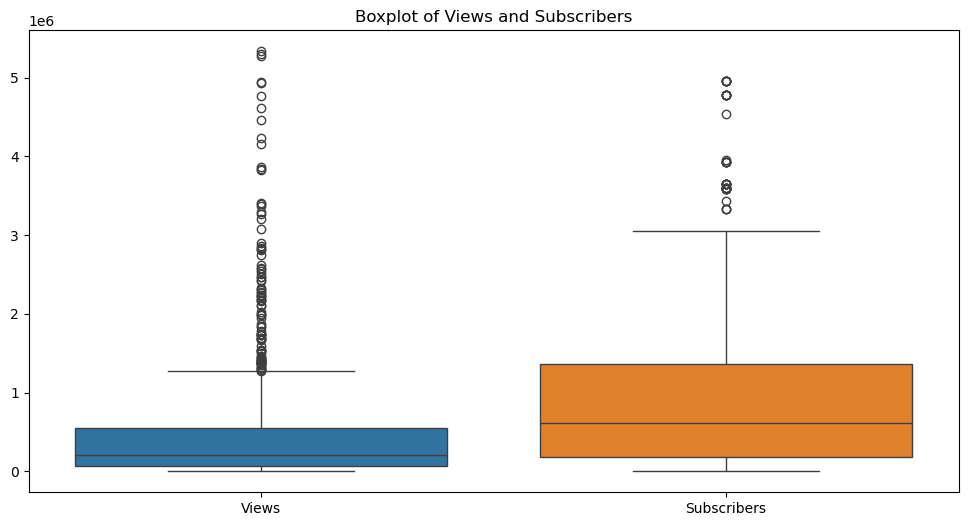

In [35]:
# Boxplot for Views and Subscribers to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=youtube_df[['Views', 'Subscribers']])
plt.title('Boxplot of Views and Subscribers')
plt.show()

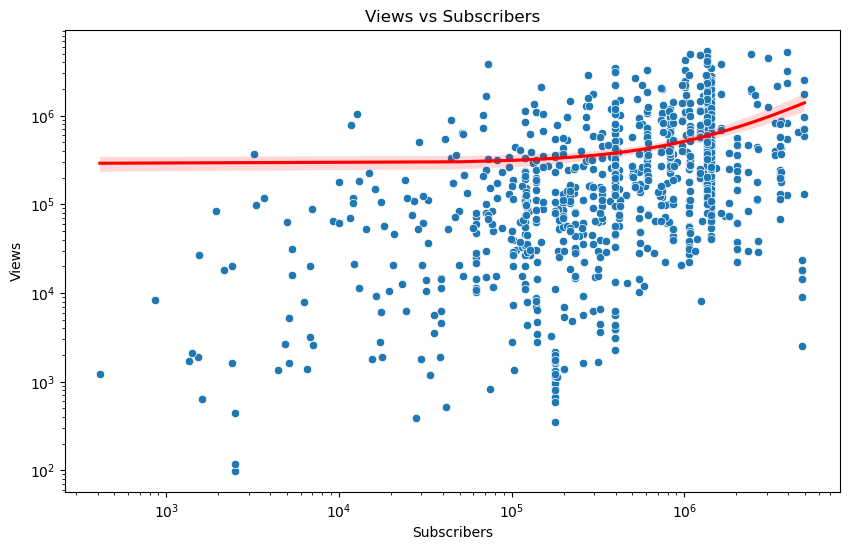

In [37]:
# Scatterplot - Views vs Subscribers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscribers', y='Views', data=youtube_df)
plt.title('Views vs Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.xscale('log')  # Log scale to handle large differences
plt.yscale('log')
sns.regplot(x='Subscribers', y='Views', data=youtube_df, scatter=False, color='red')
plt.show()

There is a slightly positive correlation between Subscribers and Views. The regression line (in red) slightly curves upward, 
#suggesting that views increase more rapidly for larger channels.

However, the plot shows significant dispersion, indicating that while larger channels tend to accumulate more views, 
some smaller channels still achieve high view counts (outperforming), which means that subscriber count alone does not guarantee high views.

Conclusion: Some videos deviate significantly above the regression line, representing outliers or videos that perform exceptionally
well compared to the channel size.

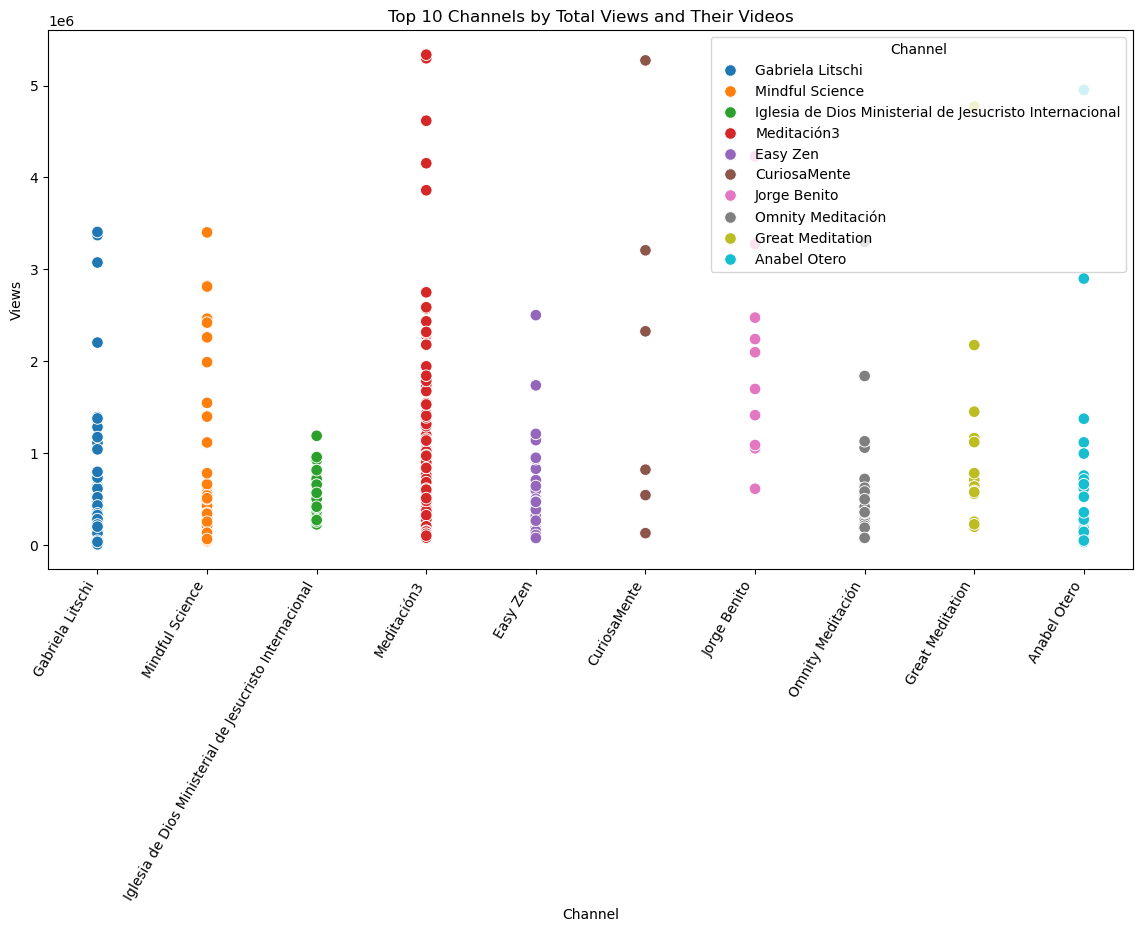

In [47]:
#Top 10 channels with more views
# Group by Channel and sum views
top_channels = youtube_df.groupby('Channel')['Views'].sum().nlargest(10).index

# Filter for videos from these top channels
top_channel_videos = youtube_df[youtube_df['Channel'].isin(top_channels)]

plt.figure(figsize=(14, 7))
sns.scatterplot(x='Channel', y='Views', data=top_channel_videos, hue='Channel', s=70)
plt.xticks(rotation=60, ha='right')  # Rota y alinea hacia la derecha
plt.title('Top 10 Channels by Total Views and Their Videos')
plt.ylabel('Views')
plt.xlabel('Channel')
plt.show()

Channels, such as "Meditación3" and "Mindful Science," consistently produce videos with high views, contributing heavily to their overall dominance.

"Gabriela Litschi" and "Iglesia de Dios Ministerial" channels have fewer data points (fewer videos), but their individual videos perform well.

Conclusion: The disparity between channels suggests that some channels drive views through a large volume of videos, while others achieve success with fewer, higher-performing videos.

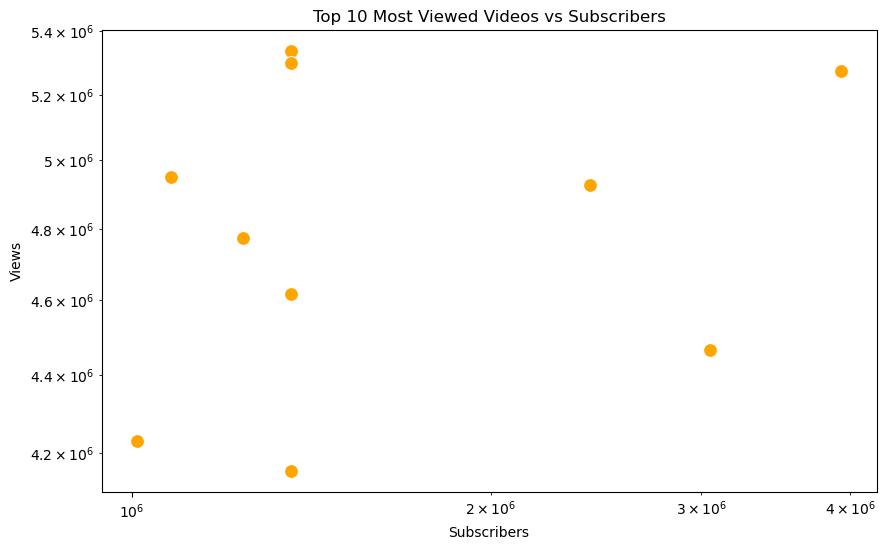

In [41]:
#Top 10 videos with more views vs subscribers
# Top 10 most viewed videos
top_10_videos = youtube_df.nlargest(10, 'Views')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscribers', y='Views', data=top_10_videos, s=100, color='orange')
plt.title('Top 10 Most Viewed Videos vs Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.xscale('log')
plt.yscale('log')
plt.show()

The scatterplot shows that the top 10 most viewed videos come from channels with widely varying subscriber counts.
Some top-performing videos are from channels with millions of subscribers, while others come from channels with smaller followings.
Channels with smaller subscriber counts achieving top views could indicate strong engagement, niche targeting, or viral success.

Conclusion: This reinforces the notion that content quality, virality, or trending topics can drive high viewership independently of channel size.

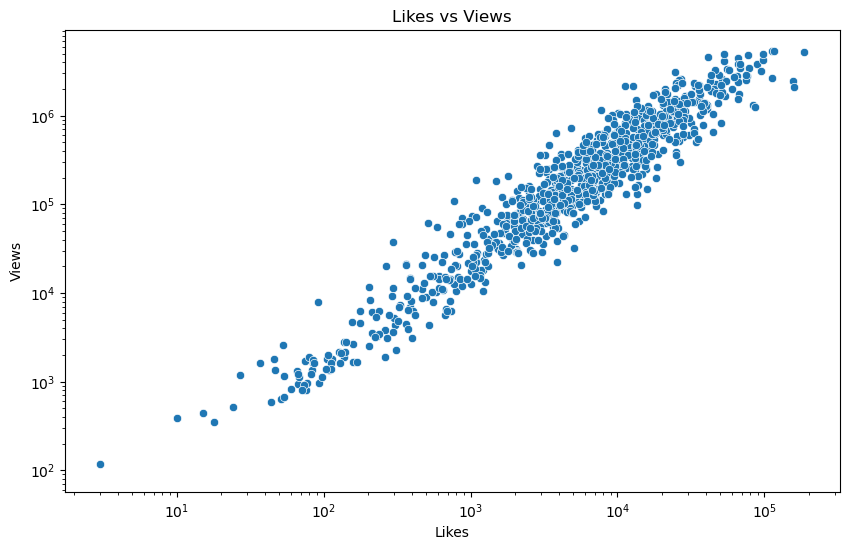

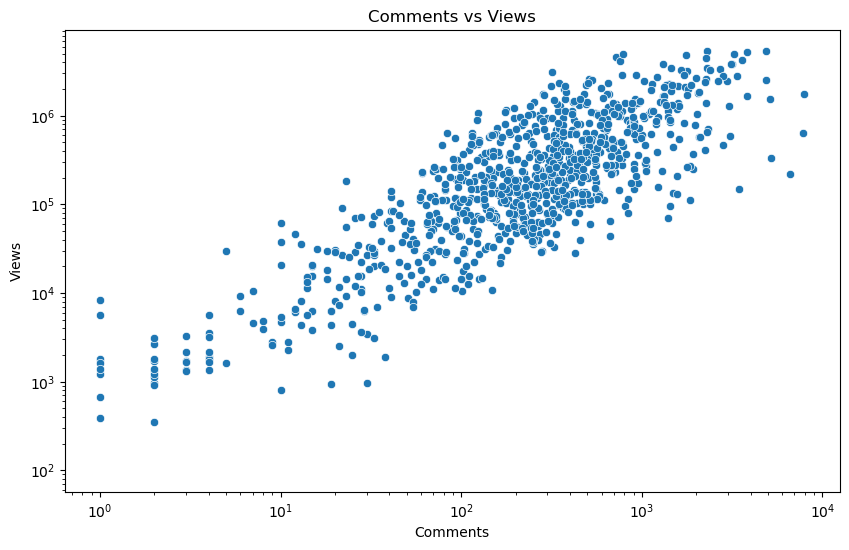

In [45]:
#Likes and Comments correlation
# Scatterplot - Likes vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Views', data=youtube_df)
plt.title('Likes vs Views')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Scatterplot - Comments vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Comments', y='Views', data=youtube_df)
plt.title('Comments vs Views')
plt.xlabel('Comments')
plt.ylabel('Views')
plt.xscale('log')
plt.yscale('log')
plt.show()

There is a strong positive correlation between likes and views, suggesting that videos with more likes consistently receive higher engagement in terms of views. However, the spread of comments is wider compared to likes, suggesting that while views drive comments, not all high-performing videos receive proportional engagement in the comment section. This could indicate that certain types of content (like tutorials or emotionally engaging videos) elicit more comments than others.

### Overall Insights and Conclusions:
- Subscriber count correlates with views, but there are notable exceptions where smaller channels outperform expectations.
- Engagement metrics (likes and comments) scale consistently with views, reinforcing their role as performance indicators.
- Top-performing channels often achieve high total views through consistent content, while others rely on a few viral hits.

# Outlier Analysis

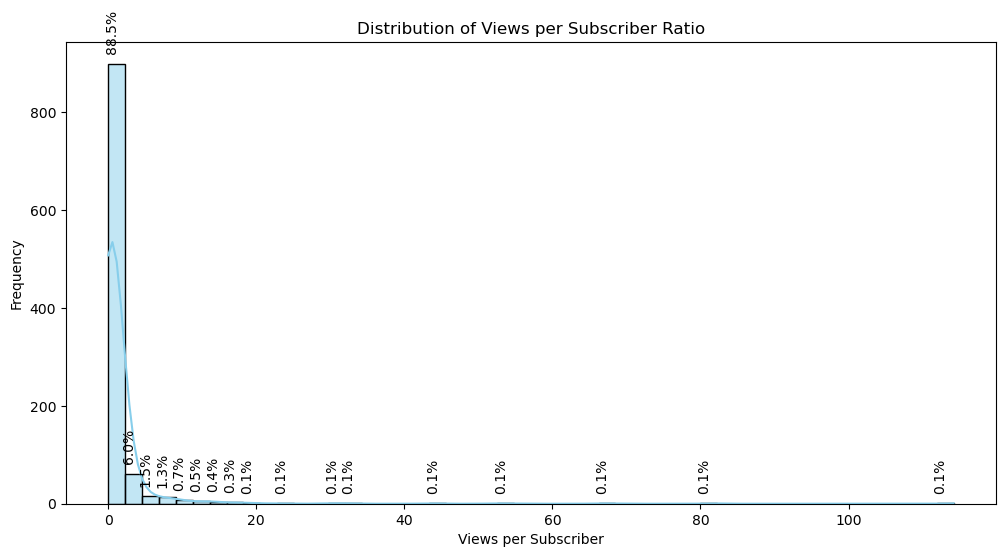

In [57]:
# Calculate KPI Views per Subscriber
youtube_df['Views_per_Subscriber'] = youtube_df['Views'] / youtube_df['Subscribers']

# Create the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(youtube_df['Views_per_Subscriber'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Views per Subscriber Ratio')
plt.xlabel('Views per Subscriber')
plt.ylabel('Frequency')

# Calculate the percentage for each bar
counts, bin_edges = np.histogram(youtube_df['Views_per_Subscriber'], bins=50)
total_videos = len(youtube_df)
percentages = (counts / total_videos) * 100

# Add percentage labels vertically on top of each bar
for i in range(len(counts)):
    if counts[i] > 0:  # Only show labels for bars with data
        plt.text(bin_edges[i] + 0.5, counts[i] + 20,  # Adjust height
                 f'{percentages[i]:.1f}%', 
                 ha='center', va='bottom', fontsize=10, rotation=90)  # Vertical rotation

plt.show()

88.5% of videos have a Views per Subscriber ratio between 0-2, indicating that most videos perform in line with or slightly above their subscriber base. This suggests that for most channels,  the number of views scales proportionally with their subscribers.

However, there are a few outliers with significantly higher ratios, suggesting rare outperforming videos that exceed expectations.

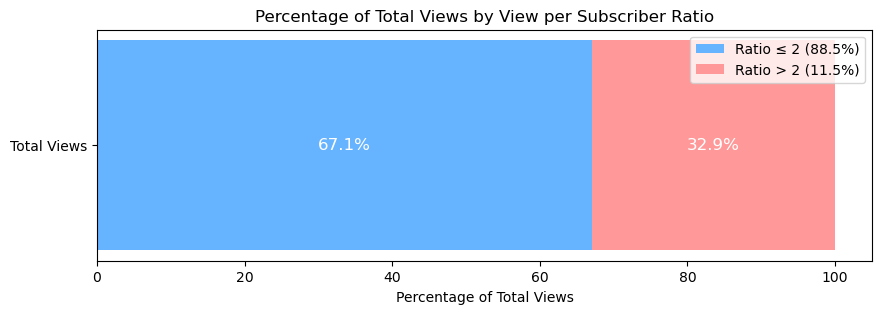

In [63]:
# Divide the dataframe into two groups (ratio > 2 and ratio ≤ 2)
outliers = youtube_df[youtube_df['Views_per_Subscriber'] > 2]
regular_videos = youtube_df[youtube_df['Views_per_Subscriber'] <= 2]

# Sum views for each group
outlier_views = outliers['Views'].sum()
regular_views = regular_videos['Views'].sum()

# Calculate percentages
total_views = outlier_views + regular_views
outlier_percentage = (outlier_views / total_views) * 100
regular_percentage = (regular_views / total_views) * 100

# Create the stacked bar chart with adjusted height
plt.figure(figsize=(10, 3))  # Width = 10, Height = 3
plt.barh(['Total Views'], [regular_percentage], color='#66b3ff', label='Ratio ≤ 2 (88.5%)')
plt.barh(['Total Views'], [outlier_percentage], left=[regular_percentage], color='#ff9999', label='Ratio > 2 (11.5%)')

# Add percentage labels
plt.text(regular_percentage / 2, 0, f'{regular_percentage:.1f}%', ha='center', va='center', fontsize=12, color='white')
plt.text(regular_percentage + outlier_percentage / 2, 0, f'{outlier_percentage:.1f}%', ha='center', va='center', fontsize=12, color='white')

# Title and legend
plt.title('Percentage of Total Views by View per Subscriber Ratio')
plt.xlabel('Percentage of Total Views')
plt.legend(loc='upper right')
plt.show()

C:\Users\veves\AppData\Local\Temp\ipykernel_19076\3162106439.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Title_Word_Count'] = outliers['Title'].apply(count_words)
C:\Users\veves\AppData\Local\Temp\ipykernel_19076\3162106439.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_videos['Title_Word_Count'] = regular_videos['Title'].apply(count_words)


Outliers - Title Word Count:
count    131.000000
mean      10.129771
std        3.574260
min        3.000000
25%        8.000000
50%       10.000000
75%       13.000000
max       19.000000
Name: Title_Word_Count, dtype: float64

Regular Videos - Title Word Count:
count    885.000000
mean      10.976271
std        3.711987
min        1.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       22.000000
Name: Title_Word_Count, dtype: float64


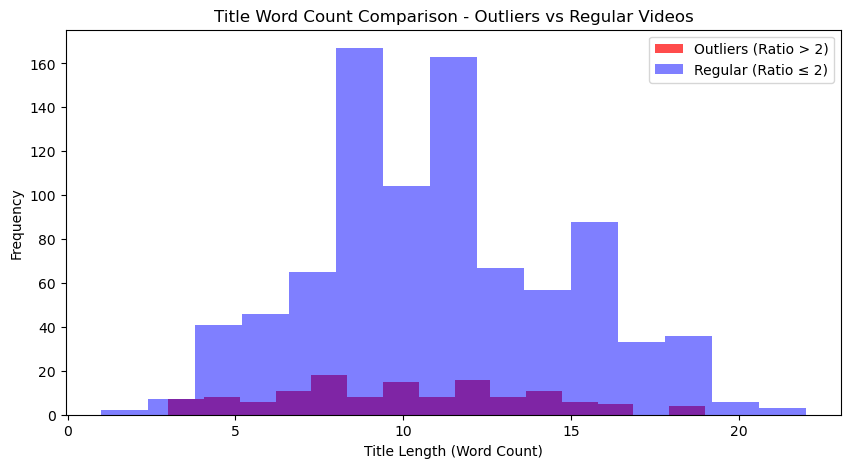

In [76]:
#2. Analyze Title Length
# Function to calculate the number of words in the title
def count_words(title):
    return len(title.split())

# Apply the function to both groups
outliers['Title_Word_Count'] = outliers['Title'].apply(count_words)
regular_videos['Title_Word_Count'] = regular_videos['Title'].apply(count_words)

# Print word count statistics
print("Outliers - Title Word Count:")
print(outliers['Title_Word_Count'].describe())

print("\nRegular Videos - Title Word Count:")
print(regular_videos['Title_Word_Count'].describe())

# Plot histogram comparing word count of outliers and regular videos
plt.figure(figsize=(10, 5))
plt.hist(outliers['Title_Word_Count'], bins=15, alpha=0.7, label='Outliers (Ratio > 2)', color='red')
plt.hist(regular_videos['Title_Word_Count'], bins=15, alpha=0.5, label='Regular (Ratio ≤ 2)', color='blue')
plt.xlabel('Title Length (Word Count)')
plt.ylabel('Frequency')
plt.title('Title Word Count Comparison - Outliers vs Regular Videos')
plt.legend()
plt.show()

Outlier videos (ratio > 2) tend to have shorter titles compared to regular videos (ratio ≤ 2).
Videos with significantly higher performance relative to subscribers often use short and direct titles.

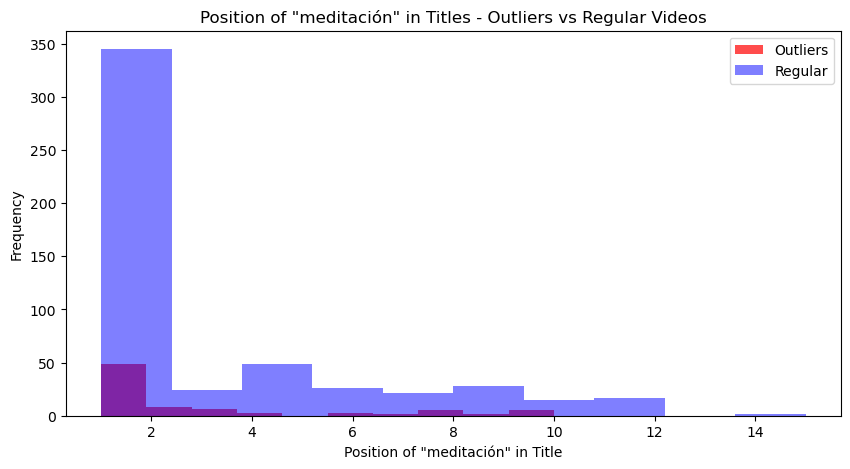

In [92]:
#Position of the Word "Meditación" in Titles
def find_meditation_position(title):
    words = title.lower().split()
    if 'meditación' in words:
        return words.index('meditación') + 1  # 1-based index
    return 0  # If "meditación" is not found, return 0

# Apply the function to detect "meditación" position
outliers.loc[:, 'Meditation_Position'] = outliers['Title'].apply(find_meditation_position)
regular_videos.loc[:, 'Meditation_Position'] = regular_videos['Title'].apply(find_meditation_position)

# Plot histogram showing the position of "meditación"
plt.figure(figsize=(10, 5))
plt.hist(outliers[outliers['Meditation_Position'] > 0]['Meditation_Position'], bins=10, alpha=0.7, label='Outliers', color='red')
plt.hist(regular_videos[regular_videos['Meditation_Position'] > 0]['Meditation_Position'], bins=10, alpha=0.5, label='Regular', color='blue')
plt.xlabel('Position of "meditación" in Title')
plt.ylabel('Frequency')
plt.title('Position of "meditación" in Titles - Outliers vs Regular Videos')
plt.legend()
plt.show()

The word "meditación" appears more frequently at the beginning of titles in regular videos. However, in outliers, while it also appears at the beginning, its position is more spread out across the title.
High-performing videos may experiment with greater creativity in title composition, placing "meditación" in different positions for differentiation.

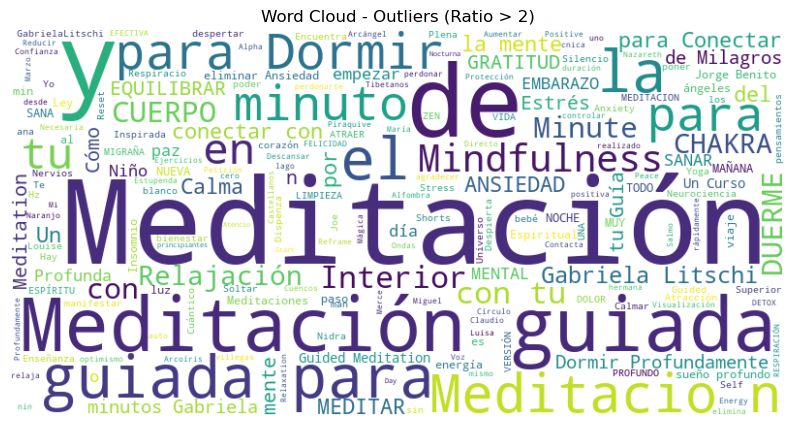

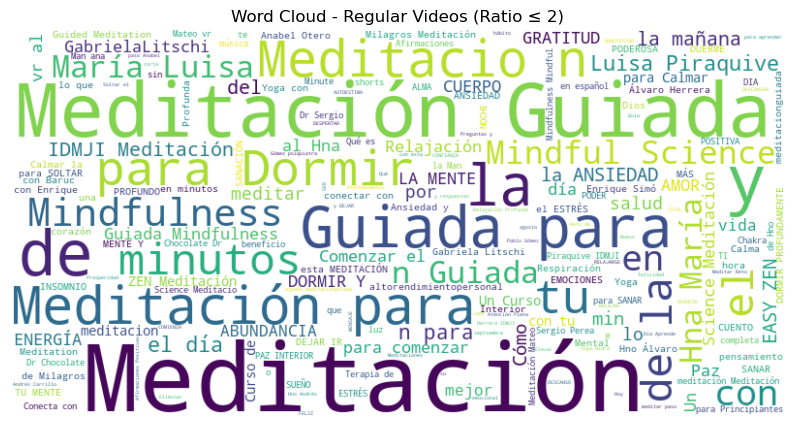

In [74]:
#4. Generate Word Clouds for Outliers and Regular Videos
# Combine titles for outliers and regular videos into large strings
outlier_text = " ".join(outliers['Title'].dropna())
regular_text = " ".join(regular_videos['Title'].dropna())

# Generate word cloud for outliers
plt.figure(figsize=(10, 6))
wordcloud_outliers = WordCloud(width=800, height=400, background_color='white').generate(outlier_text)
plt.imshow(wordcloud_outliers, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Outliers (Ratio > 2)')
plt.show()

# Generate word cloud for regular videos
plt.figure(figsize=(10, 6))
wordcloud_regular = WordCloud(width=800, height=400, background_color='white').generate(regular_text)
plt.imshow(wordcloud_regular, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Regular Videos (Ratio ≤ 2)')
plt.show()

Both regular and outlier videos heavily emphasize guided meditation and sleep-related content. The similarity suggests that topic focus might not be the primary differentiator between high-performing and regular videos.

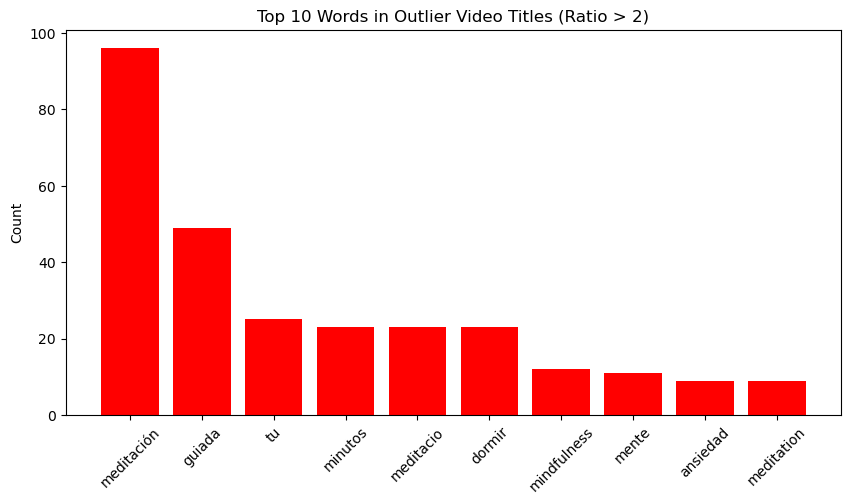

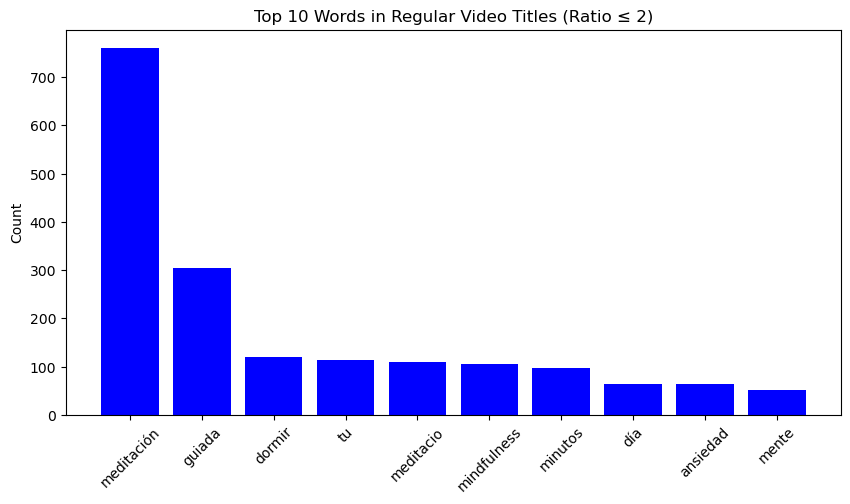

In [94]:
#5. Bar Plot of Most Frequent Words (Remove Stop Words)
stop_words = {'de', 'la', 'y', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'a', 'por', 'para', 'que', 'del', 'n'}

def get_top_words(text, stop_words):
    # Extract only full words (ignore single characters)
    words = re.findall(r'\b[a-zA-ZáéíóúüñÁÉÍÓÚÜ]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(10)

# Get top words for each group
top_outlier_words = get_top_words(outlier_text, stop_words)
top_regular_words = get_top_words(regular_text, stop_words)

# Plot top words for outliers
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_outlier_words), color='red')
plt.title('Top 10 Words in Outlier Video Titles (Ratio > 2)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot top words for regular videos
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_regular_words), color='blue')
plt.title('Top 10 Words in Regular Video Titles (Ratio ≤ 2)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In both groups, "meditación" and "guiada" dominate. The word "mindfulness" has lower representation in outliers.
Outperforming videos may achieve higher views by using direct calls (like "tu") and highlighting duration or benefits (minutes).

## Outlier Analysis' Overall Conclusion:
Outlier videos tend to:
Use shorter, direct titles.
Vary the placement of keywords like "meditación".
Emphasize duration, personalization, and immediate benefits in their titles.

# Classification models

In [121]:
# Create 'Outlier_Label' column for classification
youtube_df['Outlier_Label'] = youtube_df['Views_per_Subscriber'].apply(lambda x: 1 if x > 2 else 0)

#Create 'Title_Length' (count words in title)
youtube_df['Title_Length'] = youtube_df['Title'].apply(lambda x: len(x.split()))

#Create 'Meditation_Position' (position of 'meditación' in the title)
def find_meditation_position(title):
    words = title.lower().split()
    return words.index('meditación') + 1 if 'meditación' in words else 0

youtube_df['Meditation_Position'] = youtube_df['Title'].apply(find_meditation_position)

## Logistic Regression Model

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       265
           1       1.00      0.00      0.00        40

    accuracy                           0.87       305
   macro avg       0.93      0.50      0.46       305
weighted avg       0.89      0.87      0.81       305

Accuracy Score: 0.8688524590163934


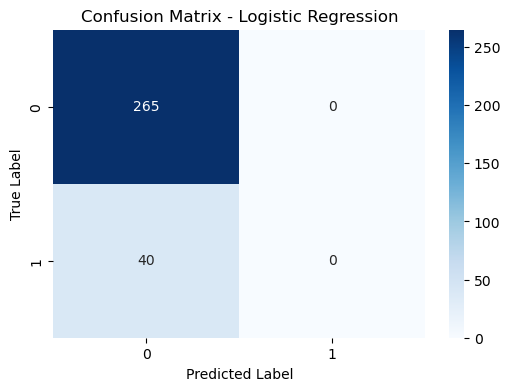

In [141]:
# Feature selection and target
X = youtube_df[['Title_Length', 'Meditation_Position']]  # Features
y = youtube_df['Outlier_Label']  # Target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)  # Fit the model

# Predict the test set
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [137]:
# Cross-validation
cv_scores = cross_val_score(log_model, X_scaled, y, cv=5)
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation Accuracy Scores: [0.86764706 0.87192118 0.87192118 0.87192118 0.87192118]
Mean CV Accuracy: 0.8710663575775138


## Random Forest Classifier Model

In [135]:
# Feature selection and target
X = youtube_df[['Title_Length', 'Meditation_Position']]  # Features
y = youtube_df['Outlier_Label']  # Target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report (RF):\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score (RF):", accuracy_score(y_test, y_pred_rf))

Classification Report (RF):
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       265
           1       0.20      0.03      0.04        40

    accuracy                           0.86       305
   macro avg       0.54      0.50      0.48       305
weighted avg       0.78      0.86      0.81       305

Accuracy Score (RF): 0.8590163934426229


In [139]:
# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_scaled, y, cv=5)
print("Cross-validation Accuracy Scores (RF):", cv_scores_rf)
print("Mean CV Accuracy (RF):", cv_scores_rf.mean())

Cross-validation Accuracy Scores (RF): [0.84803922 0.85714286 0.86699507 0.85714286 0.84729064]
Mean CV Accuracy (RF): 0.8553221288515406


## Model Performance Summary

#### Logistic Regression:

Accuracy: 87%

Cross-validation accuracy: ~87.1%

Key observation: Logistic Regression predicts the majority class (non-outliers) well, achieving 100% recall for this class. However, it completely fails to predict the minority class (outliers), resulting in 0% recall and precision for this category.



#### Random Forest Classifier:

Accuracy: 85.9%

Cross-validation accuracy: ~85.5%

Key observation: Random Forest improves slightly in predicting outliers compared to Logistic Regression, achieving a recall of 3%. Despite this, the overall recall for outliers remains very low. The majority class (non-outliers) continues to dominate the predictions.

#### Key Takeaways:

Class Imbalance: Both models struggle to predict outliers effectively, indicating severe class imbalance.
    
High Non-Outlier Accuracy: The models perform well for the majority class but fail to capture the nuances of the minority (outlier) class.

Random Forest Slightly Better: Random Forest performs marginally better in predicting outliers compared to Logistic Regression.

## Next Steps for Model Improvement

Reduce Non-Outliers (Undersampling): Limit the number of non-outliers to even out the classes.

Extract More Information from Titles: Analyze the words in video titles more deeply. Use techniques like counting important words or analyzing their meaning to help the model understand patterns better.